In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt 

In [3]:
data = pd.read_csv('C:\\Users\\Dell\\Desktop\\project m.sc\\WDIData.csv')

In [4]:
countries = data['Country Name'].unique().tolist()
codes = data['Country Code'].unique().tolist()
indicators = data['Indicator Name'].unique().tolist()
print("Countries: %d" % (len(countries))) #Old method of printing
print("Country Codes: {}".format(len(codes)))
print("Indicators: {}".format(len(indicators)))

Countries: 264
Country Codes: 264
Indicators: 1443


In [44]:
first_indicator = 'GDP per capita \(current'
country = 'India'

mask1 = data['Indicator Name'].str.contains(first_indicator) 
mask2 = data['Country Name'].str.contains(country)

# stage is just those indicators matching the USA for country code and CO2 emissions over time.
c = data[mask1 & mask2]

In [45]:
c = data[mask1 & mask2]
c = c.iloc[1:,]
c = c.transpose()
c = c.iloc[4:,]
df = pd.DataFrame(c)
df.columns = ['India']
df = df.iloc[:-1]


In [46]:

## CHECKING FOR STATONARY
from statsmodels.tsa.stattools import adfuller
df.dropna(inplace = True)
t = adfuller(df['India'],autolag ='AIC')
print('ADF = ',t[0])
print('p value = ',t[1])
print('No of lags = ',t[2])

## We observe p value less than .05 we accept Ho an dconclude that data is non stationary

ADF =  4.717725979787687
p value =  1.0
No of lags =  0


In [47]:
p = np.log10(2099.6)
p


3.322136564096103

In [48]:
l = []
l = df['India']
l[31]

303.0556053

In [49]:
l = []
l = df['India']
p = []
for i in range(0,60):
    p.append( np.log10(l[i]))
len(p)
    

60

In [50]:
df['log'] = p


In [51]:
df

,India,log
1960,82.1886,1.914812
1961,85.3543,1.931225
1962,89.8818,1.953672
1963,101.126,2.004865
1964,115.537,2.062723
1965,119.319,2.076709
1966,89.9973,1.954230
1967,96.3391,1.983803
1968,99.876,1.999461
1969,107.622,2.031902


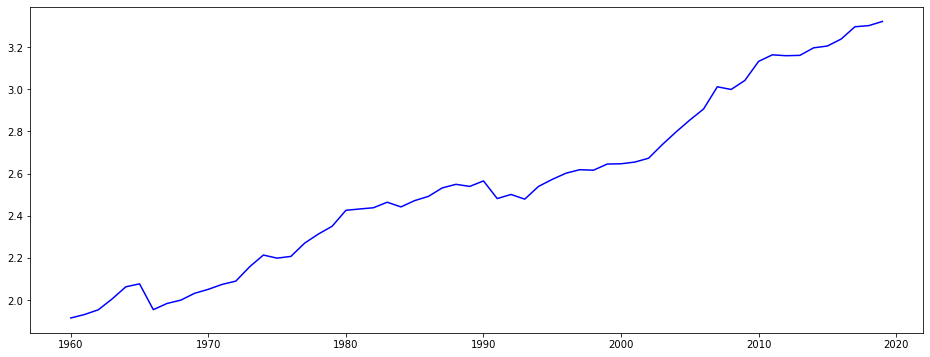

In [52]:
from matplotlib import pyplot
y = np.arange(1960,2020)
plt.subplots(figsize=(16,6)) 
plt.plot(y,df['log'],color = 'blue')

In [53]:

## CHECKING FOR STATONARY
from statsmodels.tsa.stattools import adfuller
df.dropna(inplace = True)
t = adfuller(df['log'],autolag ='AIC')
print('ADF = ',t[0])
print('p value = ',t[1])
print('No of lags = ',t[2])

ADF =  0.5938195637015252
p value =  0.9874622972173425
No of lags =  0


In [54]:

## CHECKING FOR STATONARY
from statsmodels.tsa.stattools import adfuller
df.dropna(inplace = True)
t = adfuller(df['log'],autolag ='AIC')
print('ADF = ',t[0])
print('p value = ',t[1])
print('No of lags = ',t[2])

ADF =  0.5938195637015252
p value =  0.9874622972173425
No of lags =  0


In [55]:
from pmdarima import auto_arima
step_wise = auto_arima(df['log'],trace = True,suppress_warnings = True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-213.984, Time=0.18 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-221.813, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-220.002, Time=0.10 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-219.999, Time=0.12 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-202.036, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-218.001, Time=0.05 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0] intercept
Total fit time: 0.548 seconds


In [56]:
df['diff']=df['log']-df['log'].shift(1)

In [57]:

## CHECKING FOR STATONARY
from statsmodels.tsa.stattools import adfuller
df.dropna(inplace = True)
t = adfuller(df['diff'],autolag ='AIC')
print('ADF = ',t[0])
print('p value = ',t[1])
print('No of lags = ',t[2])

ADF =  -7.069760999315994
p value =  4.972302967069835e-10
No of lags =  0


In [58]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(np.asarray(df['log']),order = (0,1,0)).fit()
model.summary()

C:\Users\Dell\Anaconda3\anaconda4\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                    D.y   No. Observations:                   58
Model:                 ARIMA(0, 1, 0)   Log Likelihood                 110.519
Method:                           css   S.D. of innovations              0.036
Date:                Wed, 19 May 2021   AIC                           -217.037
Time:                        00:11:53   BIC                           -212.916
Sample:                             1   HQIC                          -215.432
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0240      0.005      5.074      0.000       0.015       0.033
==============================================================================
"""

In [59]:
pre = model.predict(start =1,end =len(df))
df

,India,log,diff
1961,85.3543,1.931225,0.016414
1962,89.8818,1.953672,0.022446
1963,101.126,2.004865,0.051193
1964,115.537,2.062723,0.057858
1965,119.319,2.076709,0.013986
1966,89.9973,1.954230,-0.122480
1967,96.3391,1.983803,0.029573
1968,99.876,1.999461,0.015658
1969,107.622,2.031902,0.032441
1970,112.434,2.050900,0.018997


In [60]:
j=0
k = 1.931225
a = []
a.append(k)
for i in range(1960,2020,1):
    k= k +pre[j]
    a.append(k)
a

[1.931225,
 1.955206222833236,
 1.9791874456664722,
 2.003168668499708,
 2.027149891332944,
 2.05113111416618,
 2.0751123369994158,
 2.0990935598326517,
 2.1230747826658876,
 2.1470560054991235,
 2.1710372283323593,
 2.1950184511655952,
 2.218999673998831,
 2.242980896832067,
 2.266962119665303,
 2.290943342498539,
 2.3149245653317747,
 2.3389057881650106,
 2.3628870109982465,
 2.3868682338314824,
 2.4108494566647183,
 2.434830679497954,
 2.45881190233119,
 2.482793125164426,
 2.506774347997662,
 2.5307555708308977,
 2.5547367936641336,
 2.5787180164973695,
 2.6026992393306054,
 2.6266804621638413,
 2.650661684997077,
 2.674642907830313,
 2.698624130663549,
 2.722605353496785,
 2.746586576330021,
 2.7705677991632567,
 2.7945490219964926,
 2.8185302448297285,
 2.8425114676629644,
 2.8664926904962003,
 2.890473913329436,
 2.914455136162672,
 2.938436358995908,
 2.962417581829144,
 2.9863988046623797,
 3.0103800274956156,
 3.0343612503288515,
 3.0583424731620874,
 3.0823236959953233,
 3.1

In [62]:
10**3.370098369994154

2344.759855668581

In [63]:

p = []
for i in range(0,59):
    p.append( 10**a[i])
len(p)

59

In [64]:
df['forecasted'] = p

In [65]:
df

,India,log,diff,forecasted
1961,85.3543,1.931225,0.016414,85.354220
1962,89.8818,1.953672,0.022446,90.199935
1963,101.126,2.004865,0.051193,95.320749
1964,115.537,2.062723,0.057858,100.732281
1965,119.319,2.076709,0.013986,106.451036
1966,89.9973,1.954230,-0.122480,112.494455
1967,96.3391,1.983803,0.029573,118.880969
1968,99.876,1.999461,0.015658,125.630058
1969,107.622,2.031902,0.032441,132.762305
1970,112.434,2.050900,0.018997,140.299462


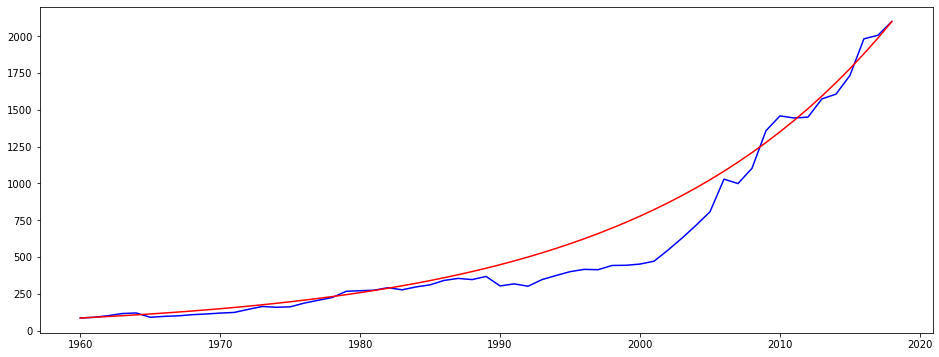

In [66]:
from matplotlib import pyplot
y = np.arange(1960,2019)
plt.subplots(figsize=(16,6)) 
plt.plot(y,df['India'],color = 'blue')
plt.plot(y,df['forecasted'],color = 'red')


In [30]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse = sqrt(mean_squared_error(df['forecasted'],df['India']))
print (rmse)


134.21665689621528


# FORECASTING

In [40]:

j=0
k =  3.370098369994154
a = []
a.append(k)
for i in range(2020,2026,1):
    k= k +pre[j]
    a.append(k)
a

[3.370098369994154,
 3.39407959282739,
 3.418060815660626,
 3.4420420384938617,
 3.4660232613270976,
 3.4900044841603335,
 3.5139857069935694]

In [42]:

p = []
for i in range(0,7):
    p.append( 10**a[i])
p

[2344.759855668581,
 2477.8761345430853,
 2618.549666523299,
 2767.209490604202,
 2924.309003104346,
 3090.3273404753877,
 3265.7708406162274]